In [7]:
using Plots

In [159]:
# secant method zero finder
function sm(x0, x1, f, max_iter = 10)
    # current and next x
    current = x0
    next = x1
    intersection = 0 # line intersection with x-axis
    
    # store intersections
    xArr = []
    
    # finding intersection
    iterations = 0
    
    while(iterations < max_iter)
        intersection = next - ( next - current )/( f(next) - f(current) ) * f(next)

        # check for NaN
        isnan(intersection) ? break :
        
        # save intersection
        push!(xArr, intersection)
        
        # set next x's
        current = next
        next = intersection
        
        
        iterations += 1
    end
    
    return xArr # return intersections
end

sm (generic function with 3 methods)

In [164]:
# sm function test
f(x) = x^2 - 4
sm(-3,-1,f)

8-element Array{Any,1}:
 -1.75   
 -2.09091
 -1.99408
 -1.99987
 -2.0    
 -2.0    
 -2.0    
 -2.0    

In [163]:
f(x) = x^5 - x - 1
bound = 2
plot(f,-bound,bound,label="",color="black",lw=1.5,grid=false)
plot!(zero,-bound,bound,label="",color="black",lw=1.5,grid=false,linestyle=:dash)

for i in sm(1,2,f,20) println(i) end
# f(1.1673039782614187)

1.0333333333333332
1.0610227672598425
1.2038724868458948
1.1593023616084683
1.1667590375955519
1.1673124276984614
1.1673039694149607
1.167303978261275
1.1673039782614187
1.1673039782614187


In [4]:
sm(0.5,1.5,f)

-1.7034600659923511

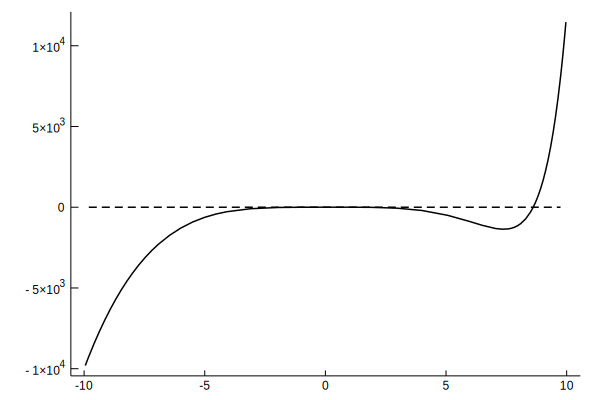

In [5]:
f(x) = exp(x) - x^4
bound = 10
plot(f,-bound,bound,label="",color="black",lw=1.5,grid=false)
plot!(zero,-bound,bound,label="",color="black",lw=1.5,grid=false,linestyle=:dash)

In [6]:
function f(x)
    
end

bound = 10
plot(f,-bound,bound,label="",color="black",lw=1.5,grid=false)
plot!(zero,-bound,bound,label="",color="black",lw=1.5,grid=false,linestyle=:dash)

LoadError: [91mMethodError: no method matching isfinite(::Void)[0m
Closest candidates are:
  isfinite([91m::Missings.Missing[39m) at /Users/matthew/.julia/v0.6/Missings/src/Missings.jl:92
  isfinite([91m::BigFloat[39m) at mpfr.jl:831
  isfinite([91m::Float16[39m) at float.jl:539
  ...[39m